In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

file = pd.read_csv("..//..//Data//toyota.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
file["model"] = [x.strip() for x in file.model]

In [4]:
mask = (file["model"] == "Aygo")|(file["model"] == "Yaris")
df2 = file.loc[mask,:]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [5]:
maska = (df2["price"] < 25000) 
df3 = df2.loc[maska,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [6]:
file2 = pd.read_csv("..//..//Data//ford.csv")

file2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [7]:
file2["model"] = [x.strip() for x in file2.model]

In [8]:
maskb = (file2["model"] == "Fiesta")|(file2["model"] == "Focus")
df2b = file2.loc[maskb,:]
df2b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [9]:
maske = (df2b["price"] < 35000) 
df3b = df2b.loc[maske,:]
df3b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [10]:
maskh = (((df3b["model"] == "Fiesta") & (df3b["price"] < 20000)) | ((df3b["model"] == "Focus") & (df3b["price"] < 27000)))
df3c = df3b.loc[maskh,:]
df3c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [11]:
Toyota = df3
Ford = df3c
list_of_dataframes = [Toyota, Ford]

In [12]:
df_cars = pd.concat(list_of_dataframes, ignore_index=True)
df_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [13]:
maskc = df_cars["year"] != 2060
df_carsc = df_cars.loc[maskc,:]
df_carsc

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [14]:
maskd = ((df_carsc["year"] == 2017)|(df_carsc["year"] == 2018)|(df_carsc["year"] == 2019)|(df_carsc["year"] == 2016)|(df_carsc["year"] == 2015)|(df_carsc["year"] == 2014)|(df_carsc["year"] == 2013)|(df_carsc["year"] == 2020))
df_carsd = df_carsc.loc[maskd,:]
df_carsd


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


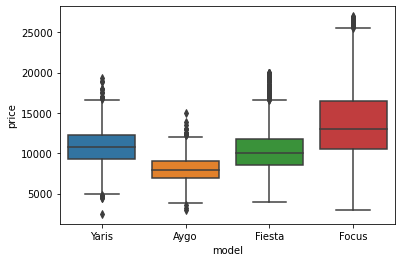

In [15]:
ax = sns.boxplot(x="model", y="price", data=df_carsd)

In [16]:
mask2 = ((df_carsd["model"] == "Aygo") & (df_carsd["mileage"] < 75000)) 
df3 = df_carsd.loc[mask2,:]
#df3.reset_index(drop=True, inplace=True)
# df3.columns =[]
df3

mask3 = ((df_carsd["model"] == "Yaris") & (df_carsd["mileage"] < 75000)) 
df4 = df_carsd.loc[mask3,:]
#df4.reset_index(drop=True, inplace=True)
# df4.columns =[]
df4

mask4 = ((df_carsd["model"] == "Fiesta") & (df_carsd["mileage"] < 75000)) 
df5 = df_carsd.loc[mask4,:]
#df5.reset_index(drop=True, inplace=True)
# df5.columns =[]
df5

mask5 = ((df_carsd["model"] == "Focus") & (df_carsd["mileage"] < 75000)) 
df6 = df_carsd.loc[mask5,:]
#df6.reset_index(drop=True, inplace=True)
# df6.columns =[]
df6
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2121,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
2122,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2123,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
2124,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
2125,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
4077,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
4078,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
4079,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
4080,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [17]:
Determine outliers using upper and lower bounds

Q3a = np.quantile(df3["mileage"], 0.75)
Q1a = np.quantile(df3["mileage"], 0.25)
IQRa = Q3a-Q1a
lower_range_a = Q1a - 1.5 * IQRa
upper_range_a = Q3a + 1.5 * IQRa

Q3b = np.quantile(df4["mileage"], 0.75)
Q1b = np.quantile(df4["mileage"], 0.25)
IQRb = Q3b-Q1b
lower_range_b = Q1b - 1.5 * IQRb
upper_range_b = Q3b + 1.5 * IQRb

Q3c = np.quantile(df5["mileage"], 0.75)
Q1c = np.quantile(df5["mileage"], 0.25)
IQRc = Q3c-Q1c
lower_range_c = Q1c - 1.5 * IQRc
upper_range_c = Q3c + 1.5 * IQRc

Q3d = np.quantile(df6["mileage"], 0.75)
Q1d = np.quantile(df6["mileage"], 0.25)
IQRd = Q3d-Q1d
lower_range_d = Q1d - 1.5 * IQRd
upper_range_d = Q3d + 1.5 * IQRd


# mask6 = ((df3["mileage"] < lower_range_a) | (df3["mileage"] > upper_range_a))
# outliers_a = df3.loc[mask6,:]

# outliers_a

mask7 = ((df4["mileage"] < lower_range_b)| (df4["mileage"] > upper_range_b))
outliers_b = df4.loc[mask7,:]

outliers_b

mask8 = ((df5["mileage"] < lower_range_c) | (df5["mileage"] > upper_range_c))
outliers_c = df5.loc[mask8,:]

outliers_c

mask9 = ((df6["mileage"] < lower_range_d) | (df6["mileage"] > upper_range_d))
outliers_d = df6.loc[mask9,:]

outliers_d.sort_values("mileage")

SyntaxError: invalid syntax (Temp/ipykernel_10484/4188883339.py, line 1)

In [18]:
mask2 = ((df_carsd["model"] == "Aygo") & (df_carsd["mileage"] < 48653)) 
df3 = df_carsd.loc[mask2,:]
#df3.reset_index(drop=True, inplace=True)
# df3.columns =[]
df3

mask3 = ((df_carsd["model"] == "Yaris") & (df_carsd["mileage"] < 56307)) 
df4 = df_carsd.loc[mask3,:]
#df4.reset_index(drop=True, inplace=True)
# df4.columns =[]
df4

mask4 = ((df_carsd["model"] == "Fiesta") & (df_carsd["mileage"] < 54927)) 
df5 = df_carsd.loc[mask4,:]
#df5.reset_index(drop=True, inplace=True)
# df5.columns =[]
df5

mask5 = ((df_carsd["model"] == "Focus") & (df_carsd["mileage"] < 58610)) 
df6 = df_carsd.loc[mask5,:]
#df6.reset_index(drop=True, inplace=True)
# df6.columns =[]
df6

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4083,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
4084,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
4089,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
4098,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
4104,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
15164,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
15166,Focus,2017,18500,Manual,10960,Petrol,145,41.5,2.0
15168,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


In [19]:
list_of_dataframes = [df3, df4, df5,df6]
dfb = pd.concat(list_of_dataframes)

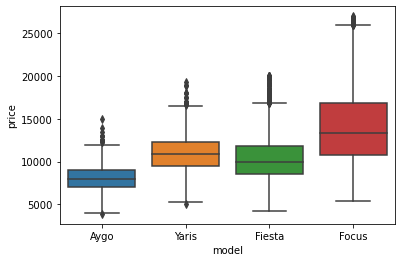

In [20]:
ax = sns.boxplot(x="model", y="price", data=dfb)

In [21]:
mask = ((dfb['mileage'] <= (18816+(12425.64*2))) | (dfb['price'] <=(11140 +(3431.54*2))))
dfc = dfb.loc[mask]
dfc
mask2 =  dfc['engineSize'] != 0
dfd = dfc.loc[mask2]
dfd

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2121,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
2122,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2123,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
2124,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
2125,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
15164,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
15166,Focus,2017,18500,Manual,10960,Petrol,145,41.5,2.0
15168,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


In [22]:
dfd.reset_index(drop=True, inplace=True)

In [23]:
clean_data = dfd

In [24]:
clean_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0


In [25]:
clean_data.shape

(14233, 9)

In [26]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14233 entries, 0 to 14232
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         14233 non-null  object 
 1   year          14233 non-null  int64  
 2   price         14233 non-null  int64  
 3   transmission  14233 non-null  object 
 4   mileage       14233 non-null  int64  
 5   fuelType      14233 non-null  object 
 6   tax           14233 non-null  int64  
 7   mpg           14233 non-null  float64
 8   engineSize    14233 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1000.9+ KB


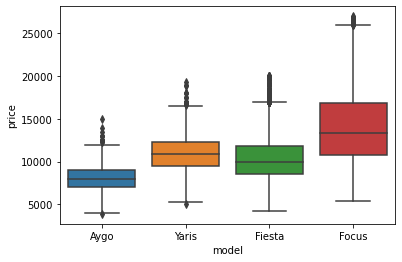

In [28]:
ax = sns.boxplot(x="model", y="price", data=dfd)